<a href="https://colab.research.google.com/github/shindejayesh987/Neural-Networks-Zero-to-Hero-By-Andrej-Karpathy/blob/main/MLP_part2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch as torch
import torch.nn.functional as F
import matplotlib.pyplot as plt

In [ ]:
words = open("/content/names.txt", "r").read().splitlines()
print(words[:8])
print(len(words))

['emma', 'olivia', 'ava', 'isabella', 'sophia', 'charlotte', 'mia', 'amelia']
32033


# 1- Preparing The Dataset

## 1.1- Build the vocabulary

In [ ]:
chars = sorted(list(set("".join(words))))
stoi = {s: i + 1 for i, s in enumerate(chars)}
stoi["."] = 0
itos = {i: s for s, i in stoi.items()}

print(itos)

{1: 'a', 2: 'b', 3: 'c', 4: 'd', 5: 'e', 6: 'f', 7: 'g', 8: 'h', 9: 'i', 10: 'j', 11: 'k', 12: 'l', 13: 'm', 14: 'n', 15: 'o', 16: 'p', 17: 'q', 18: 'r', 19: 's', 20: 't', 21: 'u', 22: 'v', 23: 'w', 24: 'x', 25: 'y', 26: 'z', 0: '.'}


## 1.2- Build the dataset

In [ ]:
block_size = 3

X, Y = [], []

for w in words:

    print(w)

    # init context with [0, 0, 0]
    context = [0] * block_size

    for ch in w + ".":
        # idx of label letter
        ix = stoi[ch]

        # append context and label
        X.append(context)
        Y.append(ix)

        # print them in form (ABC --> D)
        print(f"{''.join(itos[i] for i in context)} --> {itos[ix]}")

        # advance context
        context = context[1:] + [ix]

X = torch.tensor(X)
Y = torch.tensor(Y)

Streaming output truncated to the last 5000 lines.
michail
... --> m
..m --> i
.mi --> c
mic --> h
ich --> a
cha --> i
hai --> l
ail --> .
michale
... --> m
..m --> i
.mi --> c
mic --> h
ich --> a
cha --> l
hal --> e
ale --> .
mihail
... --> m
..m --> i
.mi --> h
mih --> a
iha --> i
hai --> l
ail --> .
miken
... --> m
..m --> i
.mi --> k
mik --> e
ike --> n
ken --> .
mikyng
... --> m
..m --> i
.mi --> k
mik --> y
iky --> n
kyn --> g
yng --> .
mila
... --> m
..m --> i
.mi --> l
mil --> a
ila --> .
moaaz
... --> m
..m --> o
.mo --> a
moa --> a
oaa --> z
aaz --> .
moaz
... --> m
..m --> o
.mo --> a
moa --> z
oaz --> .
moeez
... --> m
..m --> o
.mo --> e
moe --> e
oee --> z
eez --> .
mohamadou
... --> m
..m --> o
.mo --> h
moh --> a
oha --> m
ham --> a
ama --> d
mad --> o
ado --> u
dou --> .
mohammadomar
... --> m
..m --> o
.mo --> h
moh --> a
oha --> m
ham --> m
amm --> a
mma --> d
mad --> o
ado --> m
dom --> a
oma --> r
mar --> .
mohith
... --> m
..m --> o
.mo --> h
moh --> i
ohi --> t
h

In [ ]:
X.shape, X.dtype, Y.shape, Y.dtype

(torch.Size([228146, 3]), torch.int64, torch.Size([228146]), torch.int64)

## 1.3- Prepare The Embeddings

In [ ]:
C = torch.rand((27, 2))

# Embedding an int

# 1- explicitly (faster ✅)
print(C[5])
# 2- using one hot
print(F.one_hot(torch.tensor([5]), num_classes=27).float() @ C)

tensor([0.9767, 0.0287])
tensor([[0.9767, 0.0287]])


In [ ]:
# Embedding a full tensor
emb = C[X]
emb.shape

torch.Size([228146, 3, 2])

# 2- Building The Model

## 2.1- Hidden Layers

In [ ]:
in_size = 2 * 3 # 3 embeddings, 2D each
hidden_size = 100 # no. of neurons

W1 = torch.randn((in_size, hidden_size))
b1 = torch.randn(hidden_size)

h = emb.view(-1, in_size) @ W1 + b1

In [ ]:
out_size = 27 # no. of neurons

W2 = torch.randn((hidden_size, out_size))
b2 = torch.randn(out_size)

logtis = h @ W2 + b2

logtis.shape

torch.Size([228146, 27])

## 2.2- Applying Softmax

In [ ]:
counts = logtis.exp()
prob = counts / counts.sum(1, keepdims = True)

print(f"prob shape is {prob.shape}")
# check each row sums to 1
prob.sum(dim = 1)

prob shape is torch.Size([228146, 27])


tensor([1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000])

## 2.3- Negative Log Likelihood Loss

In [ ]:
# current probabilities of the correct labels y_true (with current weights)
print(prob[torch.arange(32), Y])

# nll loss
loss = - prob[torch.arange(32), Y].log().mean()
loss

IndexError: shape mismatch: indexing tensors could not be broadcast together with shapes [32], [228146]

## 2.4- Model Summary

In [ ]:
g = torch.Generator().manual_seed(2147483647)
C = torch.rand((27, 2), generator = g)
W1 = torch.randn((in_size, hidden_size), generator = g)
b1 = torch.randn(hidden_size, generator = g)
W2 = torch.randn((hidden_size, out_size), generator = g)
b2 = torch.randn(out_size, generator = g)

parameters = [C, W1, b1, W2, b2]
print(f"number of params = {sum(p.nelement() for p in parameters)}")

number of params = 3481


In [ ]:
emb = C[X]

h = torch.tanh(emb.view(-1, in_size) @ W1 + b1)
logits = h @ W2 + b2

# calculate the loss
# 1- Manually
# counts = logits.exp()
# prob = counts / counts.sum(1, keepdims = True)
# loss = - prob[torch.arange(32), Y].log().mean()

# 2- Using Cross Entropy
loss = F.cross_entropy(logits, Y)

loss

tensor(11.3023)

In [ ]:
# Cross Entropy is better: beside being more efficient, it prevents overflow by subtracting the max +ve value
logits = torch.tensor([-100, -3, 0, 100]) - 100
counts = logits.exp()
probs = counts / counts.sum()

print(counts)

tensor([0.0000e+00, 1.4013e-45, 3.7835e-44, 1.0000e+00])


# 3- Training

In [ ]:
g = torch.Generator().manual_seed(12344321)
C = torch.rand((27, 2), generator = g)
W1 = torch.randn((in_size, hidden_size), generator = g)
b1 = torch.randn(hidden_size, generator = g)
W2 = torch.randn((hidden_size, out_size), generator = g)
b2 = torch.randn(out_size, generator = g)

parameters = [C, W1, b1, W2, b2]
print(f"number of params = {sum(p.nelement() for p in parameters)}")

for p in parameters:
    p.requires_grad = True

number of params = 3481


## 3 3.1- Over 32 examples only

In [ ]:
for _ in range(100):

    # Forward Pass
    emb = C[X]
    h = torch.tanh(emb.view(-1, in_size) @ W1 + b1)
    logits = h @ W2 + b2
    loss = F.cross_entropy(logits, Y)

    # Backward Pass
    for p in parameters:
        p.grad = None

    loss.backward()

    # update
    for p in parameters:
        p.data -= 0.1 * p.grad

print(loss.item())

2.9158265590667725


we are getting very low loss because we're overfitting on 32 examples

## 3.2- Over the dataset (modify X & Y from Build dataset cell)

In [ ]:
for _ in range(100):

    # minibatch construct
    ix = torch.randint(0, X.shape[0], (32,)) # now size of emb is (32, 3, 2) again

    # Forward Pass
    emb = C[X[ix]]
    # print(emb.shape)
    h = torch.tanh(emb.view(-1, in_size) @ W1 + b1)
    logits = h @ W2 + b2
    loss = F.cross_entropy(logits, Y[ix])

    # Backward Pass
    for p in parameters:
        p.grad = None

    loss.backward()

    # update
    for p in parameters:
        p.data -= 0.1 * p.grad

print(f"mini batch loss {loss.item()}")

mini batch loss 3.1428422927856445


In [ ]:
# Forward Pass
emb = C[X]
# print(emb.shape)
h = torch.tanh(emb.view(-1, in_size) @ W1 + b1)
logits = h @ W2 + b2
loss = F.cross_entropy(logits, Y)

print(f"Training set loss {loss.item()}")

Training set loss 3.248051404953003


## 3.3- Finding a good initial learning rate

Text(0.5, 1.0, 'stepping between exponents')

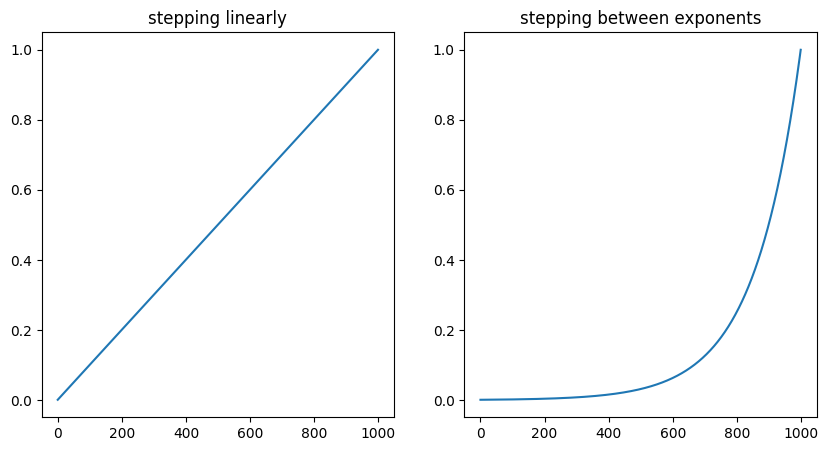

In [ ]:
lre = torch.linspace(-3, 0, 1000)
lrs = 10 ** lre

# plot both next to each other
fig, axes = plt.subplots(1,2, figsize = (10,5))

axes[0].plot(torch.linspace(0.001, 1, 1000))
axes[0].set_title("stepping linearly")

axes[1].plot(lrs)
axes[1].set_title("stepping between exponents")


In [ ]:
lossi = []

for i in range(1000):

    # minibatch construct
    ix = torch.randint(0, X.shape[0], (32,)) # now size of emb is (32, 3, 2) again

    # Forward Pass
    emb = C[X[ix]]
    # print(emb.shape)
    h = torch.tanh(emb.view(-1, in_size) @ W1 + b1)
    logits = h @ W2 + b2
    loss = F.cross_entropy(logits, Y[ix])

    # Backward Pass
    for p in parameters:
        p.grad = None

    loss.backward()

    # update
    lr = lrs[i]
    for p in parameters:
        p.data -= lr * p.grad

    # track loss
    lossi.append(loss.item())

print(f"mini batch loss {loss.item()}")

mini batch loss 8.289548873901367


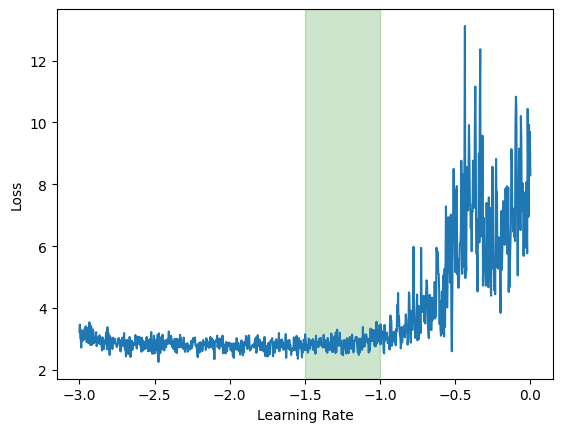

In [ ]:
plt.plot(lre, lossi)

plt.axvspan(-1.5, -1, color='g', alpha=0.2)
plt.xlabel('Learning Rate')
plt.ylabel('Loss')
plt.show()

In [ ]:
# use the new learning rate
lossi = []

for i in range(10000):

    # minibatch construct
    ix = torch.randint(0, X.shape[0], (32,)) # now size of emb is (32, 3, 2) again

    # Forward Pass
    emb = C[X[ix]]
    # print(emb.shape)
    h = torch.tanh(emb.view(-1, in_size) @ W1 + b1)
    logits = h @ W2 + b2
    loss = F.cross_entropy(logits, Y[ix])

    # Backward Pass
    for p in parameters:
        p.grad = None

    loss.backward()

    # update
    # set lr to 0.1, then to 0.01
    lr = 0.01
    for p in parameters:
        p.data -= lr * p.grad

    # track loss
    lossi.append(loss.item())

print(f"mini batch loss {loss.item()}")
# Forward Pass
emb = C[X]
# print(emb.shape)
h = torch.tanh(emb.view(-1, in_size) @ W1 + b1)
logits = h @ W2 + b2
loss = F.cross_entropy(logits, Y)

print(f"Training set loss {loss.item()}")

mini batch loss 2.593102216720581
Training set loss 2.4609670639038086


we superpassed bigram loss (about 2.46)

# 4- Train Dev Test Split

## 4.1 Prepare the datasets

In [ ]:
def build_dataset(words, block_size = 3):

  X, Y = [], []

  for w in words:

    context = [0] * block_size
    for ch in w + '.':

      ix = stoi[ch]

      X.append(context)
      Y.append(ix)

      context = context[1:] + [ix]

  X = torch.tensor(X)
  Y = torch.tensor(Y)
  print(X.shape, Y.shape)
  return X, Y

import random
random.seed(42)
random.shuffle(words)
n1 = int(0.8*len(words))
n2 = int(0.9*len(words))

Xtr, Ytr = build_dataset(words[:n1])
Xdev, Ydev = build_dataset(words[n1:n2])
Xte, Yte = build_dataset(words[n2:])

torch.Size([182625, 3]) torch.Size([182625])
torch.Size([22655, 3]) torch.Size([22655])
torch.Size([22866, 3]) torch.Size([22866])


## 4.2 Training

In [ ]:
g = torch.Generator().manual_seed(12344321)
C = torch.rand((27, 2), generator = g)
W1 = torch.randn((in_size, hidden_size), generator = g)
b1 = torch.randn(hidden_size, generator = g)
W2 = torch.randn((hidden_size, out_size), generator = g)
b2 = torch.randn(out_size, generator = g)

# use Xtr and Ytr
X = Xtr
Y = Ytr

parameters = [C, W1, b1, W2, b2]
print(f"number of params = {sum(p.nelement() for p in parameters)}")

for p in parameters:
    p.requires_grad = True

number of params = 3481


In [ ]:
# use the new learning rate
lossi = []

for i in range(10000):

    # minibatch construct
    ix = torch.randint(0, Xtr.shape[0], (32,)) # now size of emb is (32, 3, 2) again

    # Forward Pass
    emb = C[Xtr[ix]]
    # print(emb.shape)
    h = torch.tanh(emb.view(-1, in_size) @ W1 + b1)
    logits = h @ W2 + b2
    loss = F.cross_entropy(logits, Ytr[ix])

    # Backward Pass
    for p in parameters:
        p.grad = None

    loss.backward()

    # update
    # set lr to 0.1, then to 0.01
    lr = 0.01
    for p in parameters:
        p.data -= lr * p.grad

    # track loss
    lossi.append(loss.item())

print(f"mini batch loss {loss.item()}")

# Forward Pass
emb = C[Xdev]
# print(emb.shape)
h = torch.tanh(emb.view(-1, in_size) @ W1 + b1)
logits = h @ W2 + b2
loss = F.cross_entropy(logits, Ydev)

print(f"Dev set loss {loss.item()}")

mini batch loss 3.3602235317230225
Dev set loss 2.612581968307495


In [ ]:
# Forward Pass
emb = C[Xtr]
# print(emb.shape)
h = torch.tanh(emb.view(-1, in_size) @ W1 + b1)
logits = h @ W2 + b2
loss = F.cross_entropy(logits, Ytr)

print(f"Training set loss {loss.item()}")

Training set loss 2.6201834678649902


Comment: Training loss is close to Dev loss ➡️ The model isn't overfitting

# 5- Expirement1: Larger Hidden Layer

In [ ]:
hidden_size = 300

g = torch.Generator().manual_seed(12344321)
C = torch.rand((27, 2), generator = g)
W1 = torch.randn((in_size, hidden_size), generator = g)
b1 = torch.randn(hidden_size, generator = g)
W2 = torch.randn((hidden_size, out_size), generator = g)
b2 = torch.randn(out_size, generator = g)

# use Xtr and Ytr
X = Xtr
Y = Ytr

parameters = [C, W1, b1, W2, b2]
print(f"number of params = {sum(p.nelement() for p in parameters)}")

for p in parameters:
    p.requires_grad = True

number of params = 10281


In [ ]:
# use the new learning rate
lossi = []
stepi = []

for i in range(30000):

    # minibatch construct
    ix = torch.randint(0, Xtr.shape[0], (32,)) # now size of emb is (32, 3, 2) again

    # Forward Pass
    emb = C[Xtr[ix]]
    # print(emb.shape)
    h = torch.tanh(emb.view(-1, in_size) @ W1 + b1)
    logits = h @ W2 + b2
    loss = F.cross_entropy(logits, Ytr[ix])

    # Backward Pass
    for p in parameters:
        p.grad = None

    loss.backward()

    # update
    # set lr to 0.1, then to 0.01
    lr = 0.01
    for p in parameters:
        p.data -= lr * p.grad

    # track loss
    lossi.append(loss.item())
    stepi.append(i)

print(f"mini batch loss {loss.item()}")

# Forward Pass
emb = C[Xdev]
# print(emb.shape)
h = torch.tanh(emb.view(-1, in_size) @ W1 + b1)
logits = h @ W2 + b2
loss = F.cross_entropy(logits, Ydev)

print(f"Dev set loss {loss.item()}")

mini batch loss 2.577672004699707
Dev set loss 2.5186607837677


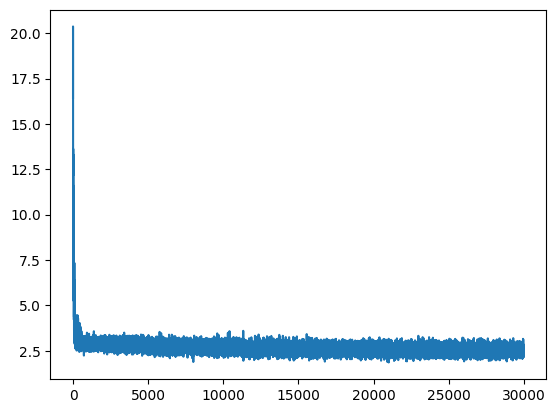

In [ ]:
plt.plot(stepi, lossi)

# 6- Visualizing The Embedding Vectors

In [ ]:
C[:,0].data

tensor([0.7315, 0.8048, 0.6654, 0.6090, 0.6066, 0.7904, 0.6133, 0.6380, 0.6419,
        0.7483, 0.5532, 0.5646, 0.6065, 0.5491, 0.6774, 0.8277, 0.6283, 0.5810,
        0.5949, 0.6341, 0.6147, 0.8033, 0.5025, 0.6211, 0.6435, 0.7668, 0.5516])

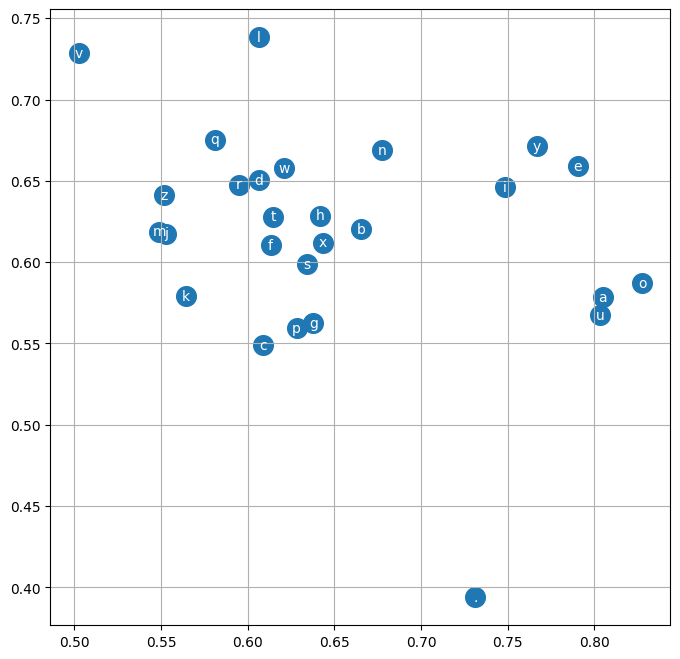

In [ ]:
plt.figure(figsize = (8,8))
plt.scatter(C[:,0].data, C[:,1].data, s = 200)
for i in range(C.shape[0]):
    plt.text(C[i,0].item(), C[i,1].item(), itos[i], ha = "center", va = "center", color = "white")
plt.grid("minor")

# 7- Expirement2: Larger Embedding Size

In [ ]:
in_size = 3 * 10
hidden_size = 200

g = torch.Generator().manual_seed(12344321)
C = torch.rand((27, 10), generator = g)
W1 = torch.randn((in_size, hidden_size), generator = g)
b1 = torch.randn(hidden_size, generator = g)
W2 = torch.randn((hidden_size, out_size), generator = g)
b2 = torch.randn(out_size, generator = g)

# use Xtr and Ytr
X = Xtr
Y = Ytr

parameters = [C, W1, b1, W2, b2]
print(f"number of params = {sum(p.nelement() for p in parameters)}")

for p in parameters:
    p.requires_grad = True

number of params = 11897


In [ ]:
# use the new learning rate
lossi = []
stepi = []

In [ ]:
for i in range(20000):

    # minibatch construct
    ix = torch.randint(0, Xtr.shape[0], (32,)) # now size of emb is (32, 3, 2) again

    # Forward Pass
    emb = C[Xtr[ix]]
    # print(emb.shape)
    h = torch.tanh(emb.view(-1, in_size) @ W1 + b1)
    logits = h @ W2 + b2
    loss = F.cross_entropy(logits, Ytr[ix])

    # Backward Pass
    for p in parameters:
        p.grad = None

    loss.backward()

    # update
    # set lr to 0.1, then to 0.01
    lr = 0.001
    for p in parameters:
        p.data -= lr * p.grad

    # track loss
    lossi.append(loss.log10().item())
    stepi.append(i)

print(f"mini batch loss {loss.item()}")

mini batch loss 2.3250505924224854


In [ ]:
# Forward Pass
emb = C[Xtr]
# print(emb.shape)
h = torch.tanh(emb.view(-1, in_size) @ W1 + b1)
logits = h @ W2 + b2
loss = F.cross_entropy(logits, Ytr)

print(f"Training set loss {loss.item()}")

# Forward Pass
emb = C[Xdev]
# print(emb.shape)
h = torch.tanh(emb.view(-1, in_size) @ W1 + b1)
logits = h @ W2 + b2
loss = F.cross_entropy(logits, Ydev)

print(f"Dev set loss {loss.item()}")


Training set loss 2.5559263229370117
Dev set loss 2.55080509185791


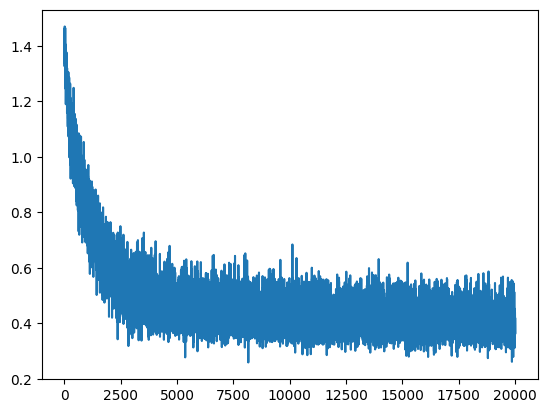

In [ ]:
plt.plot(lossi)

# 8- Sampling From the model

In [ ]:
emb.view(1,-1).shape

torch.Size([1, 679650])

In [ ]:
for _ in range(20):
    out = []
    context = [0] * block_size
    while True:
        # Forward pass
        emb = C[torch.tensor([context])]
        h = torch.tanh(emb.view(1,-1) @ W1 + b1)
        logits = h @ W2 + b2
        probs = F.softmax(logits, dim = 1)

        ix = torch.multinomial(probs, num_samples = 1).item()

        # Shift the Context Window
        context = context[1:] + [ix]

        if ix == 0:
            break

        out.append(ix)

    print("".join(itos[i] for i in out))


sxa
moraraed
oeykhkrio
ieenifex

hsotucwdeeu
ablen
josa
vaodiian
rsia
kartanicn
jterieman
emariy
cevizna
yjatda
ajzal
eak
dey
omila
jadin
